In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime 

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [3]:
df = pd.read_csv('../data/2014년 졸음운전 교통사고.csv',encoding='euc-kr')
df1 = pd.read_csv('../data/2015년 졸음운전 교통사고.csv',encoding='euc-kr')
df2 = pd.read_csv('../data/2016년 졸음운전 교통사고.csv',encoding='euc-kr')

### 1. 3개의 데이터를 병합하시요.


In [31]:
df4 = pd.concat( [df,df1,df2])
df5 = df4.set_index('구분')
df5

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


In [32]:
df5.index = pd.to_datetime(df5.index, format='%Y년%m월')
df5

,사고(건),사망(명),부상(명)
구분,,,
2014-01-01,169,7,347
2014-02-01,145,3,268
2014-03-01,206,12,358
2014-04-01,182,4,360
2014-05-01,218,17,474
2014-06-01,233,13,457
2014-07-01,229,14,431
2014-08-01,222,9,447
2014-09-01,225,15,430


### 2. 년도, 월별로 인덱스를 설정(멀티인덱스) 하고 데이터를 보여 주시요


In [68]:
df5.set_index([df5.index.year, df5.index.month])

사고(건)  사망(명)  부상(명)
구분   구분                     
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

### 3. 년도 및 월별 평균 사망자를 보여주시요

In [33]:
df5.head()

,사고(건),사망(명),부상(명)
구분,,,
2014-01-01,169,7,347
2014-02-01,145,3,268
2014-03-01,206,12,358
2014-04-01,182,4,360
2014-05-01,218,17,474


In [8]:
df4.groupby([df4.index.year, df4.index.month]).mean()[['사망(명)']]

사망(명)
구분   구분       
2014 1       7
     2       3
     3      12
     4       4
     5      17
     6      13
     7      14
     8       9
     9      15
     10     14
     11     10
     12     12
2015 1       8
     2       8
     3       4
     4      10
     5       9
     6       8
     7       7
     8      19
     9      10
     10     14
     11      3
     12      8
2016 1       5
     2       6
     3       7
     4       7
     5      13
     6      12
     7       9
     8       7
     9      13
     10     10
     11      5
     12      4

### 4.  2016년 사고대비 사망율을 구하시요

In [57]:
df5['사고대비 사망율'] = ((df5['2016']['사망(명)'] / df5['2016']['사고(건)'])*100).round(2)
df5['2016']

,사고(건),사망(명),부상(명),사고대비 사망율
구분,,,,
2016-01-01,192,5,387,2.60
2016-02-01,174,6,328,3.45
2016-03-01,217,7,435,3.23
2016-04-01,216,7,419,3.24
2016-05-01,239,13,522,5.44
2016-06-01,200,12,362,6.00
2016-07-01,227,9,460,3.96
2016-08-01,230,7,490,3.04
2016-09-01,187,13,347,6.95


In [65]:
df5.drop(columns=['사고대비 사망율'], inplace=True)

### 5. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시요


In [58]:
df6 = df5['2014'][['사망(명)','부상(명)']]
df6.head()

,사망(명),부상(명)
구분,,
2014-01-01,7,347
2014-02-01,3,268
2014-03-01,12,358
2014-04-01,4,360
2014-05-01,17,474


<AxesSubplot:xlabel='구분'>

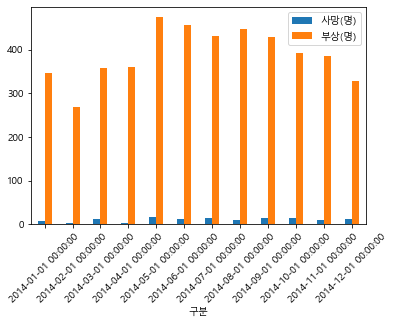

In [59]:
df6.plot(kind='bar', rot=45)

### 6. 2015년 대비  사망이 가장 많이 증가한 2016년 도 월을 구하시요

In [81]:
df6 = df5['2016']['사망(명)']-df5['2015']['사망(명)'].values
df6.nlargest(1, keep='all')

구분
2016-05-01    4
2016-06-01    4
Name: 사망(명), dtype: int64